In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Activation, Dense
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Importing the data while also dropping the columns which we will not be using

In [2]:
df=pd.read_csv("Train_Test_Network.csv").drop(['src_ip','dst_ip','label'],1)

This provides us with all the unique values present in the y column (these will be used to map the column as wll as be used as labels)

In [3]:
labels=list(df['type'].unique())

In [4]:
df['type'].count()

461043

In [5]:
labels

['normal',
 'scanning',
 'dos',
 'injection',
 'ddos',
 'password',
 'xss',
 'ransomware',
 'backdoor',
 'mitm']

Mapping each unique value of type string to type into (as the model only acepts numerical inputs and outputs)

In [6]:
df['type']=df['type'].map({
 'normal':0,
 'scanning':1,
 'dos':2,
 'injection':3,
 'ddos':4,
 'password':5,
 'xss':6,
 'ransomware':7,
 'backdoor':8,
 'mitm':9
 })

In [7]:
df.head().T

,0,1,2,3,4
ts,1554198358,1554198358,1554198359,1554198359,1554198362
src_port,1883,47260,1880,34296,46608
dst_port,52976,15600,51782,10502,53
proto,tcp,udp,tcp,tcp,udp
service,-,-,-,-,dns
duration,80549.53026,0.0,0.0,0.0,0.000549
src_bytes,1762852,0,0,0,0
dst_bytes,41933215,0,0,0,298
conn_state,OTH,S0,OTH,OTH,SHR
missed_bytes,0,0,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461043 entries, 0 to 461042
Data columns (total 42 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ts                      461043 non-null  int64  
 1   src_port                461043 non-null  int64  
 2   dst_port                461043 non-null  int64  
 3   proto                   461043 non-null  object 
 4   service                 461043 non-null  object 
 5   duration                461043 non-null  float64
 6   src_bytes               461043 non-null  int64  
 7   dst_bytes               461043 non-null  int64  
 8   conn_state              461043 non-null  object 
 9   missed_bytes            461043 non-null  int64  
 10  src_pkts                461043 non-null  int64  
 11  src_ip_bytes            461043 non-null  int64  
 12  dst_pkts                461043 non-null  int64  
 13  dst_ip_bytes            461043 non-null  int64  
 14  dns_query           

In [9]:
df.isna().sum()

ts                        0
src_port                  0
dst_port                  0
proto                     0
service                   0
duration                  0
src_bytes                 0
dst_bytes                 0
conn_state                0
missed_bytes              0
src_pkts                  0
src_ip_bytes              0
dst_pkts                  0
dst_ip_bytes              0
dns_query                 0
dns_qclass                0
dns_qtype                 0
dns_rcode                 0
dns_AA                    0
dns_RD                    0
dns_RA                    0
dns_rejected              0
ssl_version               0
ssl_cipher                0
ssl_resumed               0
ssl_established           0
ssl_subject               0
ssl_issuer                0
http_trans_depth          0
http_method               0
http_uri                  0
http_version              0
http_request_body_len     0
http_response_body_len    0
http_status_code          0
http_user_agent     

The above three cells show how the data does not contain any null values as well as the data type for each column

In [10]:
obj_colmns=list(df.select_dtypes(include='object').columns)

Getting a list of all column names that are of type object as we will need to convert them to numerical form

In [11]:
obj_colmns

['proto',
 'service',
 'conn_state',
 'dns_query',
 'dns_AA',
 'dns_RD',
 'dns_RA',
 'dns_rejected',
 'ssl_version',
 'ssl_cipher',
 'ssl_resumed',
 'ssl_established',
 'ssl_subject',
 'ssl_issuer',
 'http_trans_depth',
 'http_method',
 'http_uri',
 'http_version',
 'http_user_agent',
 'http_orig_mime_types',
 'http_resp_mime_types',
 'weird_name',
 'weird_addl',
 'weird_notice']

Removing the columns which need to be processed in another way 

In [12]:
to_remove=['dns_query','ssl_subject','ssl_issuer','http_trans_depth','http_user_agent']

Removing columns from the list of columns that will be processed

In [13]:
for i in to_remove:
  obj_colmns.remove(i)

Now for the remaining columns we convert them from type string to numerical form(int) using the catagorical function

In [14]:
for i in obj_colmns:
  df[i]=df[i].astype('category').cat.codes

In this column we needed to replace - with 0 before we could cconvert it to numeriall form, after doing that we simply converted the strings to numbers

In [15]:
to_remove.remove('http_trans_depth')
df['http_trans_depth']=pd.to_numeric(df['http_trans_depth'].replace('-','0'))

In [16]:
to_remove

['dns_query', 'ssl_subject', 'ssl_issuer', 'http_user_agent']

Converting strings to vectors for specific column which were removed from the other columns of type object

In [17]:
import chars2vec
c2v_model = chars2vec.load_model('eng_50')

def convert_text_numeric(text):
    global c2v_model
    numeric = c2v_model.vectorize_words([text]).mean()
    return numeric
for i in to_remove:
  df[i]=df[i].apply(convert_text_numeric)

In [18]:
import tensorflow as k
print(k.__version__)

2.8.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461043 entries, 0 to 461042
Data columns (total 42 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ts                      461043 non-null  int64  
 1   src_port                461043 non-null  int64  
 2   dst_port                461043 non-null  int64  
 3   proto                   461043 non-null  int8   
 4   service                 461043 non-null  int8   
 5   duration                461043 non-null  float64
 6   src_bytes               461043 non-null  int64  
 7   dst_bytes               461043 non-null  int64  
 8   conn_state              461043 non-null  int8   
 9   missed_bytes            461043 non-null  int64  
 10  src_pkts                461043 non-null  int64  
 11  src_ip_bytes            461043 non-null  int64  
 12  dst_pkts                461043 non-null  int64  
 13  dst_ip_bytes            461043 non-null  int64  
 14  dns_query           

In [20]:
df.to_csv("Processed_type.csv",index=False)

Saving the preprocessed dataset so that we dont have to repeat the previous steps if the code crashed for some reason

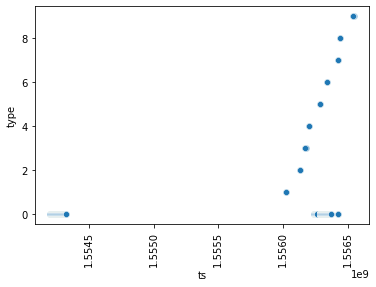

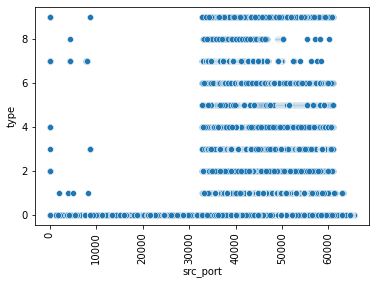

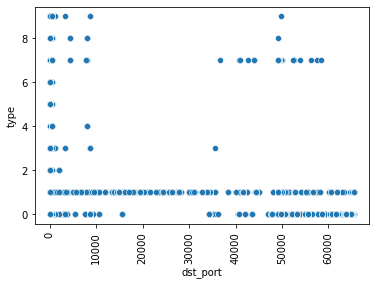

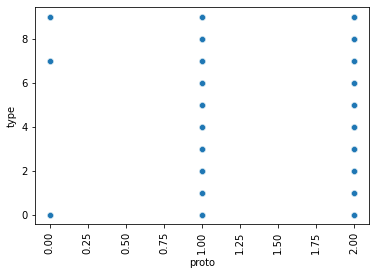

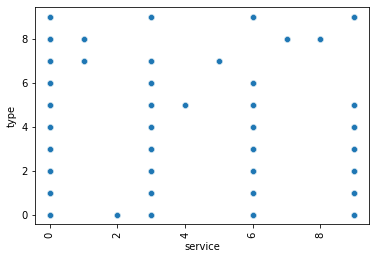

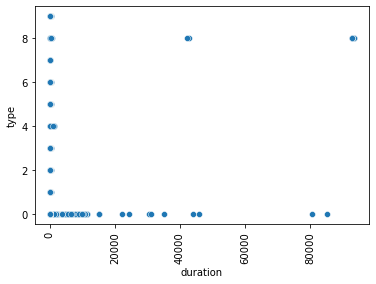

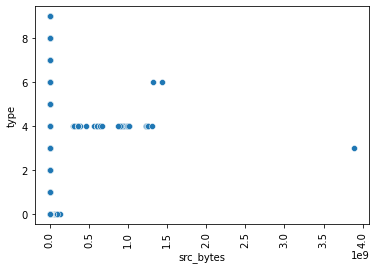

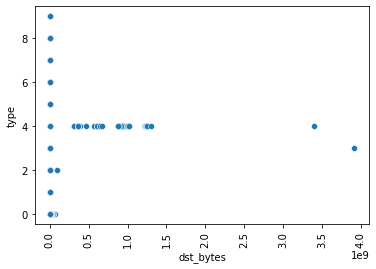

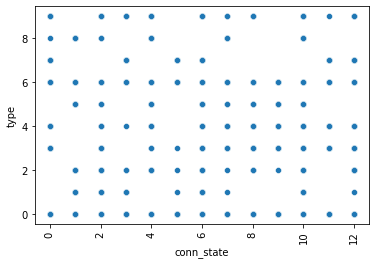

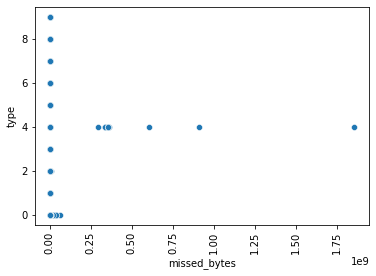

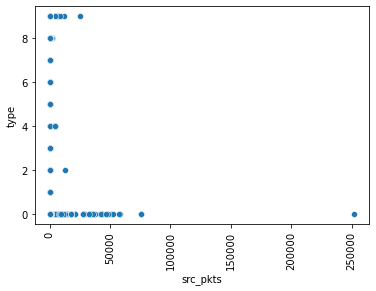

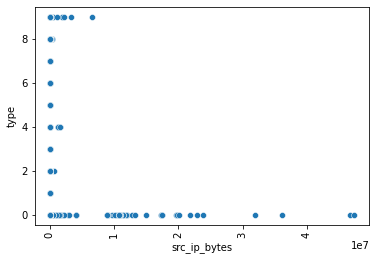

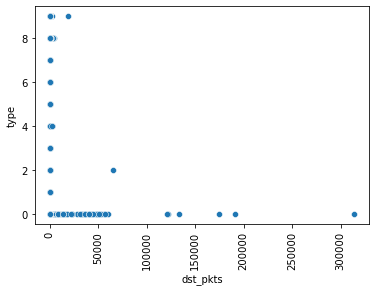

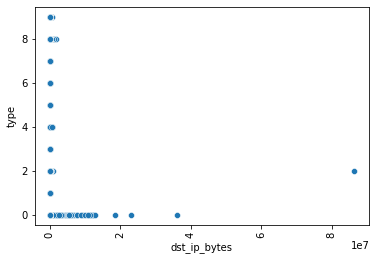

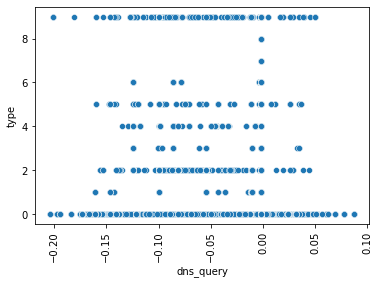

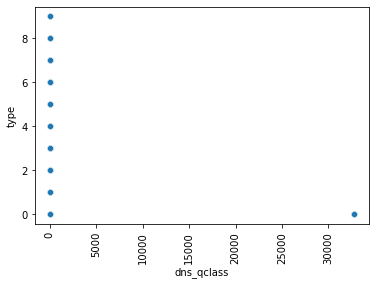

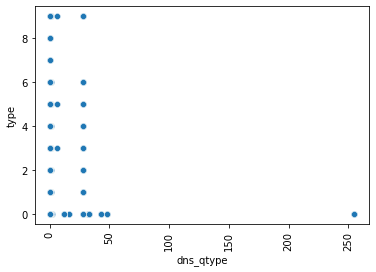

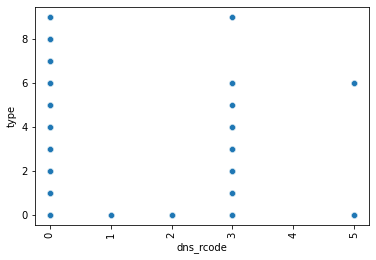

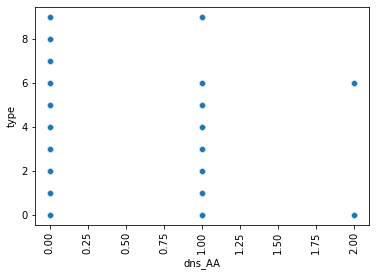

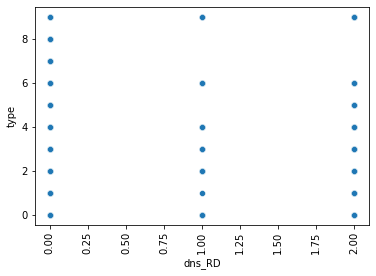

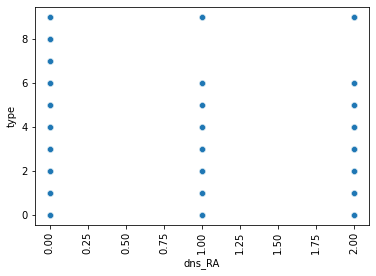

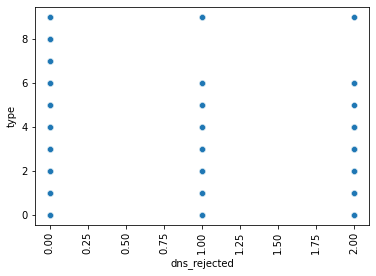

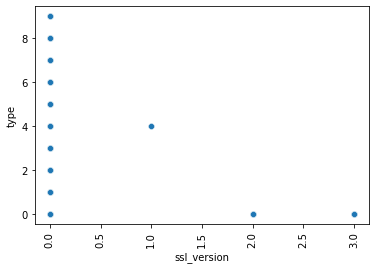

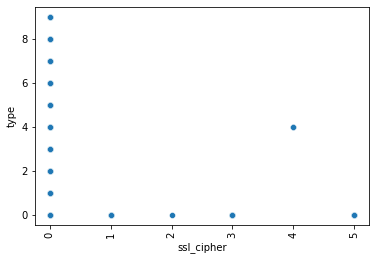

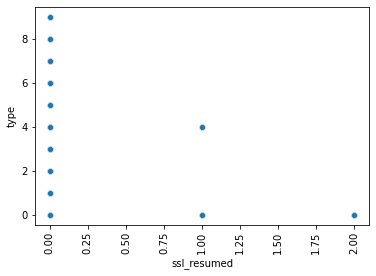

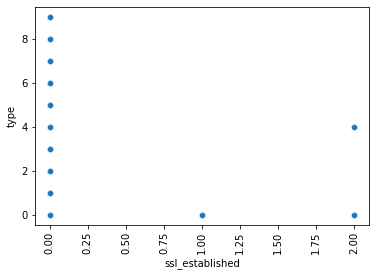

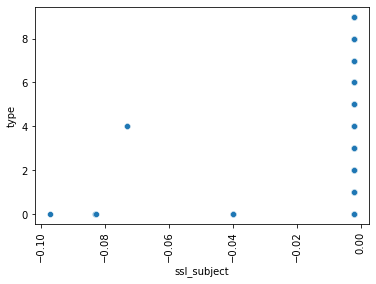

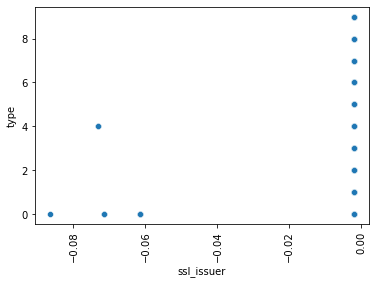

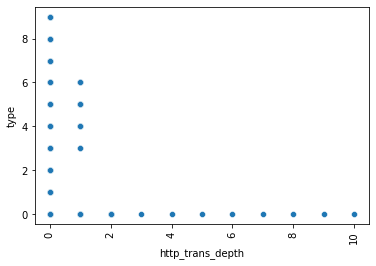

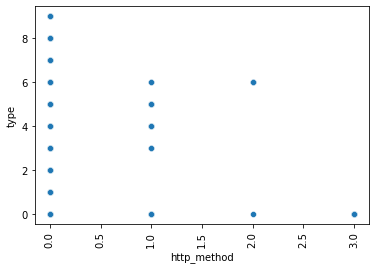

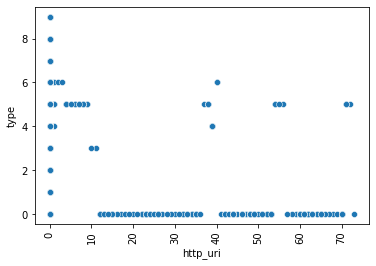

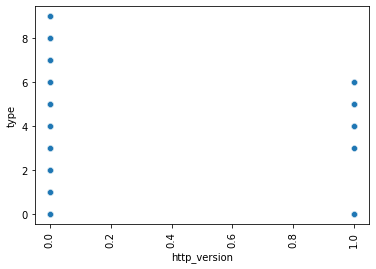

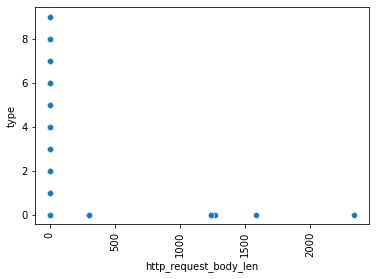

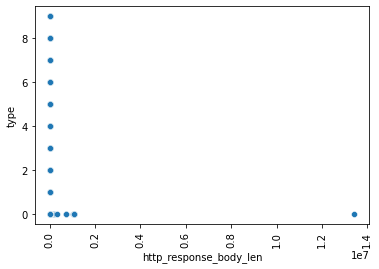

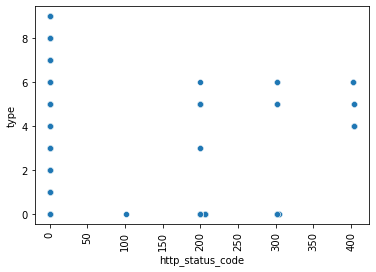

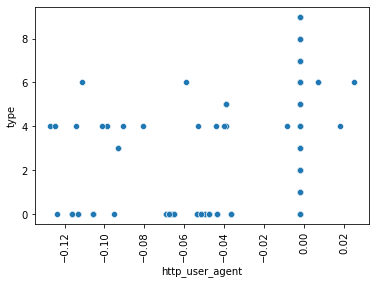

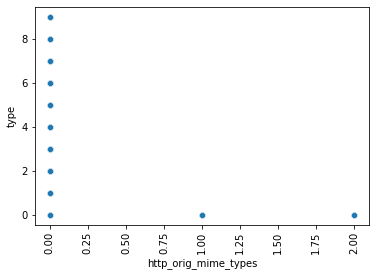

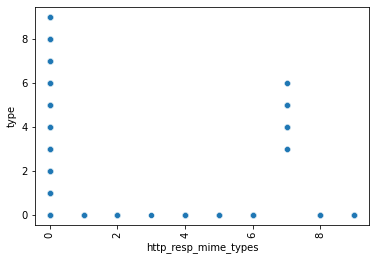

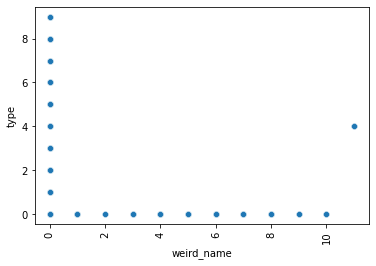

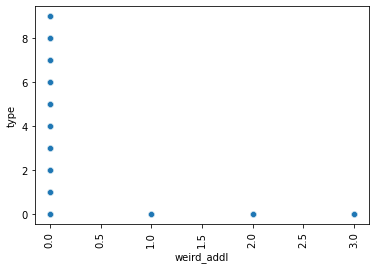

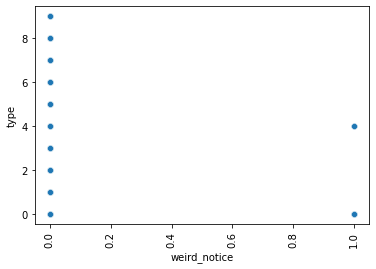

In [21]:
for feature in df.drop(['type'],1).columns:
    sns.scatterplot(x = df.drop(['type'],1)[feature], y = df["type"])
    plt.xticks(rotation=90)
    plt.ylabel("type")
    plt.xlabel(feature)
    plt.show()
    #this represents the relation between each column and the destination label
    #these scatter plots show us the relationship between different columns 

In [22]:
df=pd.read_csv('Processed_type.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461043 entries, 0 to 461042
Data columns (total 42 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ts                      461043 non-null  int64  
 1   src_port                461043 non-null  int64  
 2   dst_port                461043 non-null  int64  
 3   proto                   461043 non-null  int64  
 4   service                 461043 non-null  int64  
 5   duration                461043 non-null  float64
 6   src_bytes               461043 non-null  int64  
 7   dst_bytes               461043 non-null  int64  
 8   conn_state              461043 non-null  int64  
 9   missed_bytes            461043 non-null  int64  
 10  src_pkts                461043 non-null  int64  
 11  src_ip_bytes            461043 non-null  int64  
 12  dst_pkts                461043 non-null  int64  
 13  dst_ip_bytes            461043 non-null  int64  
 14  dns_query           

This also represents the corrolation in this one if its above 0 its +ve corrolation and -ve corrolation if its below the 0 point
And the size of the bar represents the corolation

<AxesSubplot:title={'center':'Correlation with type'}>

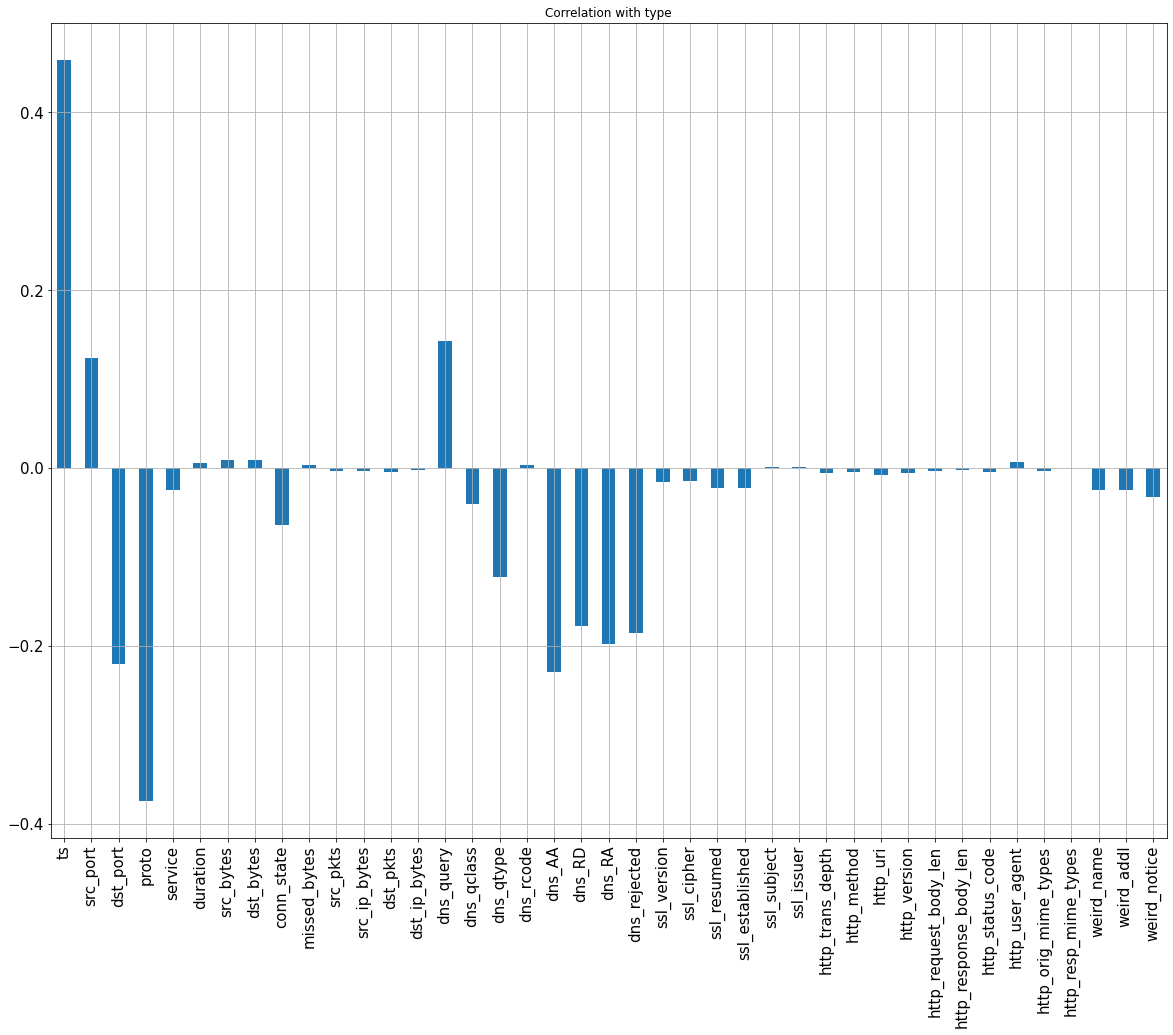

In [24]:
df.drop(columns = ['type']
    ).corrwith(df['type']).plot.bar(figsize=(20,15),
              title = 'Correlation with type',
              fontsize = 15, rot = 90,
              grid = True)

In [25]:
df.columns

Index(['ts', 'src_port', 'dst_port', 'proto', 'service', 'duration',
       'src_bytes', 'dst_bytes', 'conn_state', 'missed_bytes', 'src_pkts',
       'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'dns_query', 'dns_qclass',
       'dns_qtype', 'dns_rcode', 'dns_AA', 'dns_RD', 'dns_RA', 'dns_rejected',
       'ssl_version', 'ssl_cipher', 'ssl_resumed', 'ssl_established',
       'ssl_subject', 'ssl_issuer', 'http_trans_depth', 'http_method',
       'http_uri', 'http_version', 'http_request_body_len',
       'http_response_body_len', 'http_status_code', 'http_user_agent',
       'http_orig_mime_types', 'http_resp_mime_types', 'weird_name',
       'weird_addl', 'weird_notice', 'type'],
      dtype='object')

Based on these results these specific columns are going to get removed from the dataset

In [26]:
to_drop=[
       'ssl_subject', 'ssl_issuer', 'http_trans_depth', 'http_method',
       'http_uri', 'http_version', 'http_request_body_len',
       'http_response_body_len', 'http_status_code', 'http_user_agent',
       'http_orig_mime_types', 'http_resp_mime_types', 'dns_rcode',
       'missed_bytes', 'src_pkts','src_ip_bytes', 'dst_pkts', 'dst_ip_bytes',
       'duration','src_bytes', 'dst_bytes'
       ]

In [27]:
df.drop(to_drop,axis=1,inplace=True)

<AxesSubplot:title={'center':'Correlation with type'}>

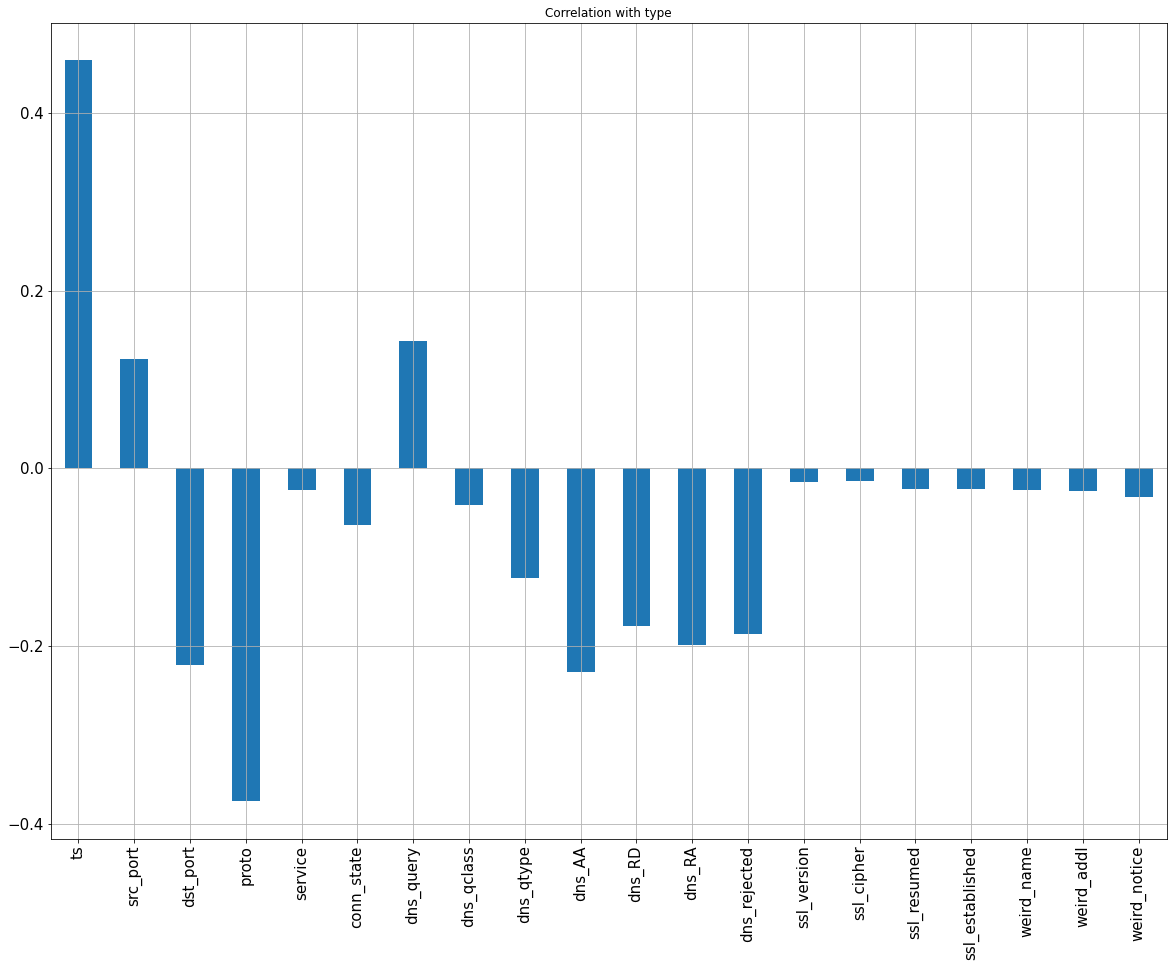

In [28]:
df.drop(columns = ['type']
    ).corrwith(df['type']).plot.bar(figsize=(20,15),
              title = 'Correlation with type',
              fontsize = 15, rot = 90,
              grid = True)

This is to make sure everything went as planned ,this was the corrolation between the dependent columns and the independent columns but the next part will be to remove the independent columns which have a high corrolation amongst themselves as they act as duplicate values which degrade the models accuracy

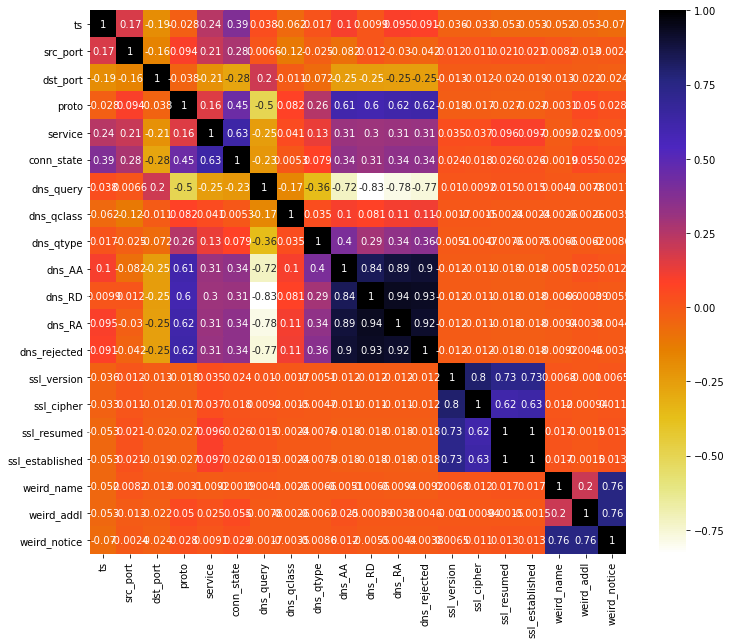

In [29]:
plt.figure(figsize=(12,10))
cor = df.drop('type',1).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [30]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
    return col_corr

In [31]:
corr_features = correlation(df.drop('type',1), 0.85)
len(set(corr_features))

3

In [32]:
corr_features

{'dns_RA', 'dns_rejected', 'ssl_established'}

In [33]:
df.drop(corr_features,axis=1,inplace=True)

The above three cells were used to remove columns with a corrolation of 85% or greater

In [34]:
df.shape

(461043, 18)

In [35]:
to_standardize=list(df.drop('type',1).columns)

In [36]:
for i in to_standardize:
    df[i]=(df[i]-df[i].mean())/df[i].std()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('type',axis=1), 
                                                    df['type'], test_size=0.30, 
                                                    random_state=30)

To get a better understanding of our model it is necessary that we test the model on data that was not used to train the model. This is because this helps us determine if the model got overfitted or not.
We did a 70 30 split

In [38]:
X_train.shape[1]

17

In [39]:
model = Sequential(
    [
        Dense(units=32,input_shape=[X_train.shape[1]]),
        Dense(units=64),
        Dense(len(y_train.unique()), activation="softmax")
    ]
)

In [40]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit( x= X_train.to_numpy(),y=y_train.to_numpy(),validation_data=[X_test,y_test]
                        
                              ,epochs=50)

Epoch 1/50
10086/10086 [==============================] - 34s 3ms/step - loss: 0.4974 - accuracy: 0.8309 - val_loss: 0.4272 - val_accuracy: 0.8538
Epoch 2/50
10086/10086 [==============================] - 37s 4ms/step - loss: 0.4234 - accuracy: 0.8510 - val_loss: 0.4135 - val_accuracy: 0.8581
Epoch 3/50
10086/10086 [==============================] - 31s 3ms/step - loss: 0.4065 - accuracy: 0.8554 - val_loss: 0.3983 - val_accuracy: 0.8549
Epoch 4/50
10086/10086 [==============================] - 30s 3ms/step - loss: 0.3960 - accuracy: 0.8582 - val_loss: 0.3890 - val_accuracy: 0.8570
Epoch 5/50
10086/10086 [==============================] - 30s 3ms/step - loss: 0.3915 - accuracy: 0.8585 - val_loss: 0.3976 - val_accuracy: 0.8537
Epoch 6/50
10086/10086 [==============================] - 31s 3ms/step - loss: 0.3872 - accuracy: 0.8597 - val_loss: 0.3793 - val_accuracy: 0.8596
Epoch 7/50
10086/10086 [==============================] - 30s 3ms/step - loss: 0.3852 - accuracy: 0.8599 - val_loss: 0

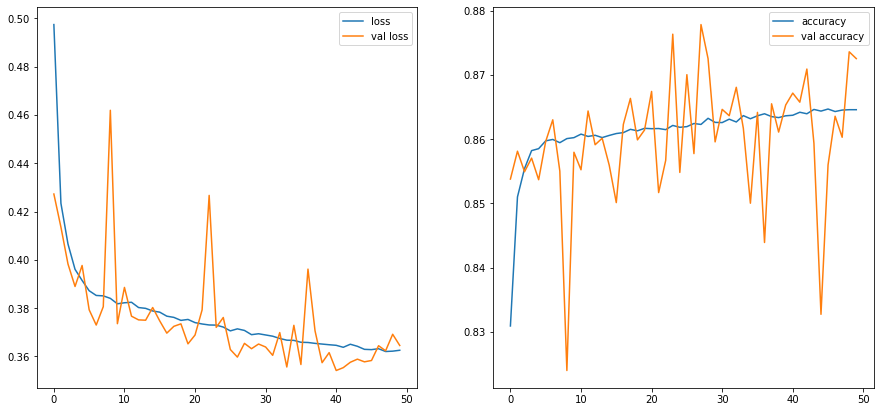

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
axes[0].plot(history.history['loss'],label="loss")
axes[0].plot(history.history['val_loss'],label="val loss")
axes[0].legend()
axes[1].plot(history.history['accuracy'],label="accuracy")
axes[1].plot(history.history['val_accuracy'],label="val accuracy")
axes[1].legend()

In [42]:
predictions = model.predict(X_test)
predictions=np.argmax(predictions, axis=1)
print(classification_report(y_test,predictions,target_names=labels))

              precision    recall  f1-score   support

      normal       0.91      0.93      0.92     89986
    scanning       0.66      0.47      0.55      6016
         dos       0.95      0.88      0.91      6103
   injection       0.82      0.86      0.84      5941
        ddos       0.25      0.11      0.15      6009
    password       0.74      0.97      0.84      5969
         xss       0.86      0.87      0.87      6020
  ransomware       0.83      0.96      0.89      6000
    backdoor       0.99      1.00      1.00      5975
        mitm       1.00      0.94      0.97       294

    accuracy                           0.87    138313
   macro avg       0.80      0.80      0.79    138313
weighted avg       0.86      0.87      0.86    138313



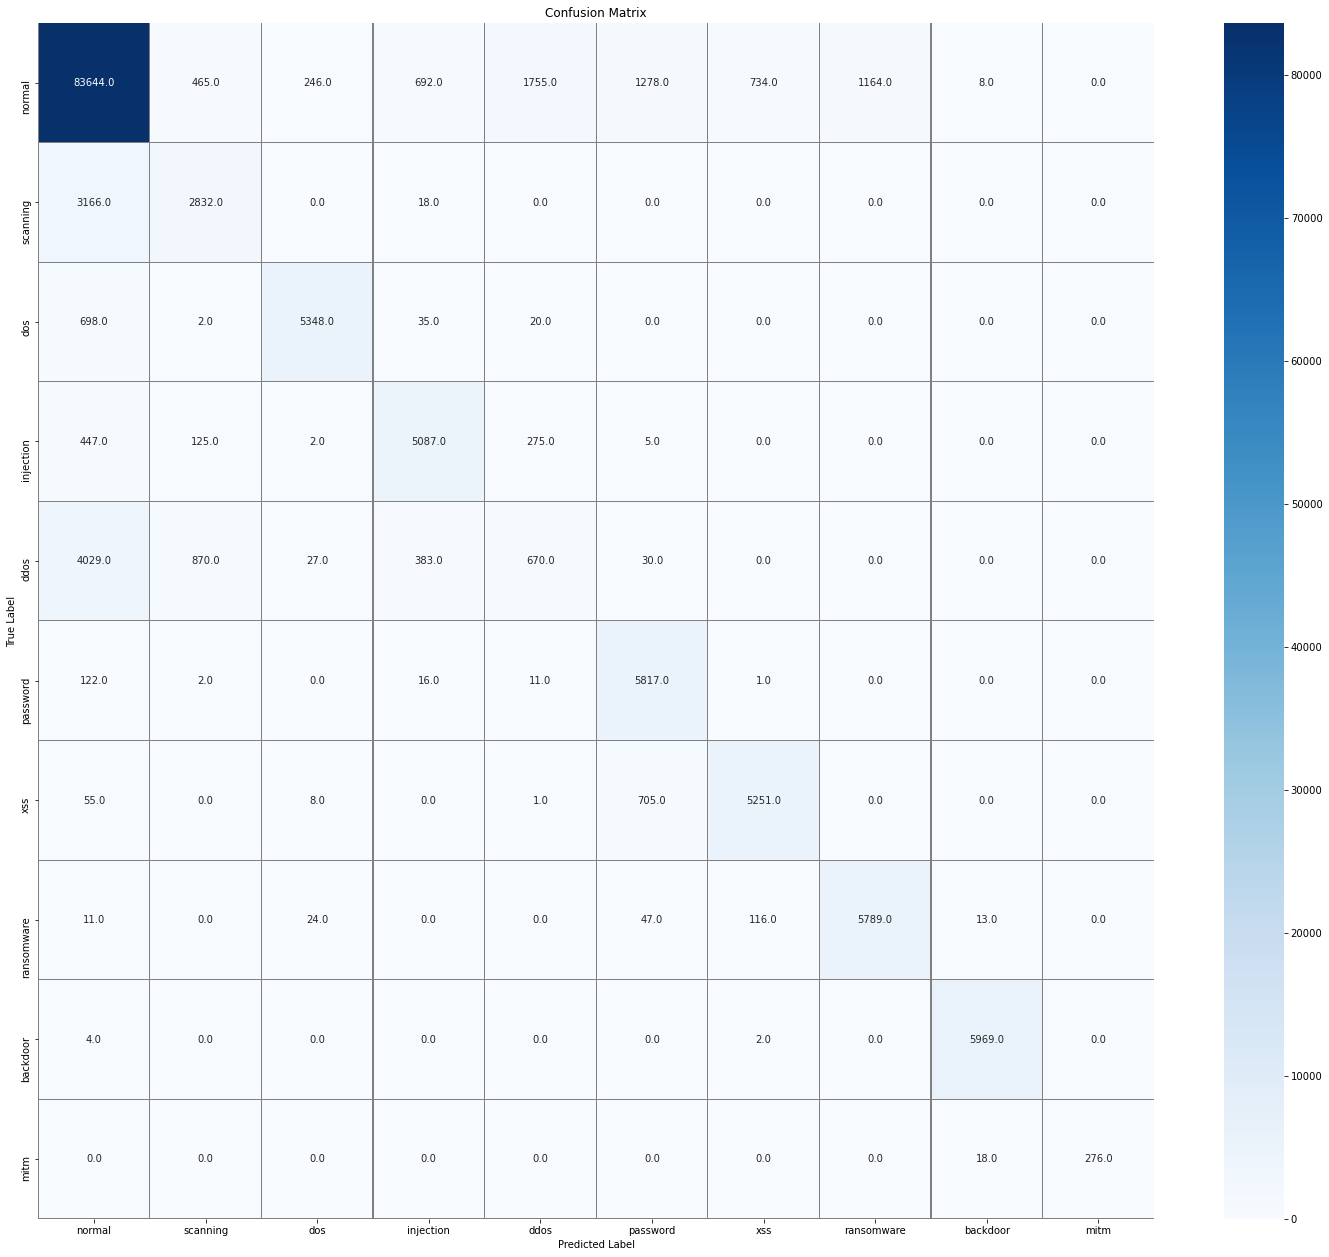

In [46]:
confusion_mtx = confusion_matrix(y_test,predictions)
f,ax = plt.subplots(figsize=(25, 22))
svm = sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.title("Confusion Matrix")
plt.show()
figure = svm.get_figure()    
figure.savefig('svm_conf.png', dpi=400)

In [44]:
model.save("type.h5")